# Special Data Types

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [98]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Problem 1

Consider the following corpus and new document:

In [99]:
data = data.frame(comment=c("I love this great movie!",
                            "I was disappointed that this movie wasn't long enough.",
                            "Way too long.",
                            "Could not have enjoyed this movie more.",
                            "What a great film."),
                   sentiment=c("favorable", "unfavorable", "unfavorable", "favorable", "favorable"))

data

comment,sentiment
I love this great movie!,favorable
I was disappointed that this movie wasn't long enough.,unfavorable
Way too long.,unfavorable
Could not have enjoyed this movie more.,favorable
What a great film.,favorable


In [100]:
new = data.frame(comment="I enjoyed these movies even more than I enjoyed data science.")
new

comment
I enjoyed these movies even more than I enjoyed data science.


Simplify the corpus text with these transformations: lower case, remove numbers, remove punctuation, remove special characters, remove stop words, stem, strip whitespace - in that order.  Convert the simplified corpus text to a classified bag of words.  Build a naive Bayes model trained by the classified bag of words to predict sentiment.  Simplify the new unclassified document in the same way that you did the corpus.  Convert the simplified new document text to a bag of words approriate for the model.  Use the model with cutoff 0.5 for favorable to predict the sentiment of the new document.

In [101]:
corpus = VCorpus(VectorSource(data$comment))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation, ucp=TRUE)
corpus = tm_map(corpus, removeSpecialChars, chars="’“”—")
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument, "english")
corpus = tm_map(corpus, stripWhitespace)

as.data.frame.content(corpus)

V1
love great movi
disappoint movi wasnt long enough
way long
enjoy movi
great film


In [102]:
dtm = DocumentTermMatrix(corpus)
data.t = as.data.frame(as.matrix(dtm))
data.tc = data.t
data.tc$sentiment = data$sentiment
data.tc

disappoint,enjoy,enough,film,great,long,love,movi,wasnt,way,sentiment
0,0,0,0,1,0,1,1,0,0,favorable
1,0,1,0,0,1,0,1,1,0,unfavorable
0,0,0,0,0,1,0,0,0,1,unfavorable
0,1,0,0,0,0,0,1,0,0,favorable
0,0,0,1,1,0,0,0,0,0,favorable


In [103]:
corpus.new = VCorpus(VectorSource(new$comment))
corpus.new = tm_map(corpus.new, content_transformer(tolower))
corpus.new = tm_map(corpus.new, removeNumbers)
corpus.new = tm_map(corpus.new, removePunctuation, ucp=TRUE)
corpus.new = tm_map(corpus.new, removeSpecialChars, chars="’“”—")
corpus.new = tm_map(corpus.new, removeWords, stopwords("english"))
corpus.new = tm_map(corpus.new, stemDocument, "english")
corpus.new = tm_map(corpus.new, stripWhitespace)

new.t = as.data.frame.content(corpus.new)
new.t

V1
enjoy movi even enjoy data scienc


In [104]:
dtm = DocumentTermMatrix(corpus.new, control=list(tokenize=unibigrams))
new.t = as.data.frame(as.matrix(dtm))
new.tc = make_columns_agree(new.t, data.t)

new.tc

disappoint,enjoy,enough,film,great,long,love,movi,wasnt,way
0,2,0,0,0,0,0,1,0,0


In [105]:
model = naiveBayes(sentiment ~ ., plain_var_names(data.tc))
prob = predict(model, plain_var_names(new.tc), type="raw")
class.predicted = as.class(prob, "favorable", cutoff=0.5)

data.frame(new, class.predicted)

comment,class.predicted
I enjoyed these movies even more than I enjoyed data science.,favorable


## Problem 2

Consider this time series training and testing data:

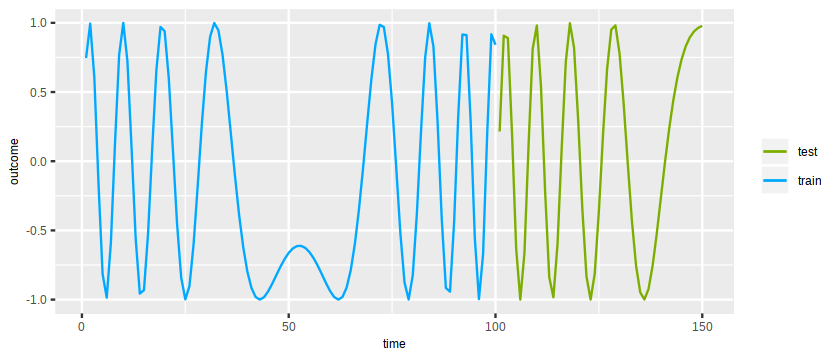

In [106]:
data.train = data.frame(time=1:100, outcome=sin(sin(0.01*(100:1))*(1:100)))
data.test = data.frame(time=101:150, outcome=sin(sin(0.01*(150:101))*(101:150)))

ggplot() +
geom_line(aes(x=time, y=outcome, color="train"), data=data.train) +
geom_line(aes(x=time, y=outcome, color="test"), data=data.test) +
scale_color_manual(values=PALETTE[c(3,1)])

Convert the training data from time series form to cross-sectional form so that you can use it to predict 1 or 2 time steps ahead given a viewpoint, a 15 time step lookback, and a 30 time step lookback.  

In [108]:
data.train.cs = data.train
data.train.cs$lookback.15 = shift_up(data.train.cs$outcome, 15)
data.train.cs$lookback.30 = shift_up(data.train.cs$outcome, 30)
data.train.cs$lookahead.1 = shift_down(data.train.cs$outcome, 1)
data.train.cs$lookahead.2 = shift_down(data.train.cs$outcome, 2)
data.train.cs = data.train.cs[31:98,]
data.train.cs

,time,outcome,lookback.15,lookback.30,lookahead.1,lookahead.2
31,31,0.9006193,-0.51917393,0.74562414,0.9986915,0.9461015
32,32,0.9986915,0.09243031,0.99487803,0.9461015,0.7692235
33,33,0.9461015,0.65666943,0.60526644,0.7692235,0.5073086
34,34,0.7692235,0.97004115,-0.15729425,0.5073086,0.2030169
35,35,0.5073086,0.93985986,-0.81594690,0.2030169,-0.1048895
36,36,0.2030169,0.59998740,-0.98590376,-0.1048895,-0.3860559
37,37,-0.1048895,0.08010536,-0.58936986,-0.3860559,-0.6203765
38,38,-0.3860559,-0.45062326,0.12941026,-0.6203765,-0.7977472
39,39,-0.6203765,-0.84108308,0.76897055,-0.7977472,-0.9164805
40,40,-0.7977472,-0.99844785,0.99915733,-0.9164805,-0.9810899


Prepare a view with origin at time step 150 in cross-sectional form.  Note: time step 150 is captured in row 50 of the test data.

In [109]:
data.test.cs = data.test
data.test.cs$lookback.15 = shift_up(data.test.cs$outcome, 15)
data.test.cs$lookback.30 = shift_up(data.test.cs$outcome, 30)
view = data.test.cs[50,]
view

,time,outcome,lookback.15,lookback.30
50,150,0.978088,-0.9478134,0.2923985


Build linear regression models to predict 1 and 2 time steps ahead given a view origin, a 15 time step lookback, and a 30 time step lookback.  Show the models' coefficients.

In [110]:
model.1 = lm(lookahead.1 ~ outcome+lookback.15+lookback.30, data.train.cs)
model.2 = lm(lookahead.2 ~ outcome+lookback.15+lookback.30, data.train.cs)
as.data.frame(model.1$coefficients)
as.data.frame(model.2$coefficients)

,model.1$coefficients
(Intercept),-0.01341647
outcome,0.88447344
lookback.15,0.04873935
lookback.30,0.01089939


,model.2$coefficients
(Intercept),-0.09930156
outcome,0.57648957
lookback.15,0.08179816
lookback.30,-0.04009437


From a view origin at time step 150, predict the outcomes at time steps 151 and 152 using the direct approach.  Show the view used to make the predictions.  Note: time step 150 is captured in row 50 of the test data.

In [111]:
view

,time,outcome,lookback.15,lookback.30
50,150,0.978088,-0.9478134,0.2923985


In [112]:
prediction.1 = predict(model.1, view)
prediction.2 = predict(model.2, view)

direct.predicted = data.frame(time=c(151, 152), 
                              outcome.predicted=c(prediction.1, prediction.2))
direct.predicted

time,outcome.predicted
151,0.8086676
152,0.3753031


From view origin at time step 150, predict the outcomes at time steps 151 and 152 using the recursive approach.  Show the views used to make the predictions.  

In [113]:
model = lm(lookahead.1 ~ outcome+lookback.15+lookback.30, data.train.cs)
viewpoint.0 = 150
view.0 = data.test.cs[data.test$time==viewpoint.0,]
view.0

,time,outcome,lookback.15,lookback.30
50,150,0.978088,-0.9478134,0.2923985


In [114]:
prediction.1 = predict(model, view.0)
viewpoint.1 = viewpoint.0 + 1

view.1 = data.frame(time=viewpoint.1, outcome=prediction.1, 
                    lookback.15=data.test$outcome[data.test$time==viewpoint.1-15],
                    lookback.30=data.test$outcome[data.test$time==viewpoint.1-30])

view.1

,time,outcome,lookback.15,lookback.30
50,151,0.8086676,-0.9990762,-0.3444119


In [115]:
prediction.2 = predict(model, view.1)
viewpoint.2 = viewpoint.1 + 1

recursive.predicted = data.frame(time=c(viewpoint.1, viewpoint.2),
                                 outcome.predicted=c(prediction.1, prediction.2))
recursive.predicted

time,outcome.predicted
151,0.8086676
152,0.6493803


Show the training data, testing data, predicted outcomes by direct approach, and predicted outcomes by recursive approach as a line chart.

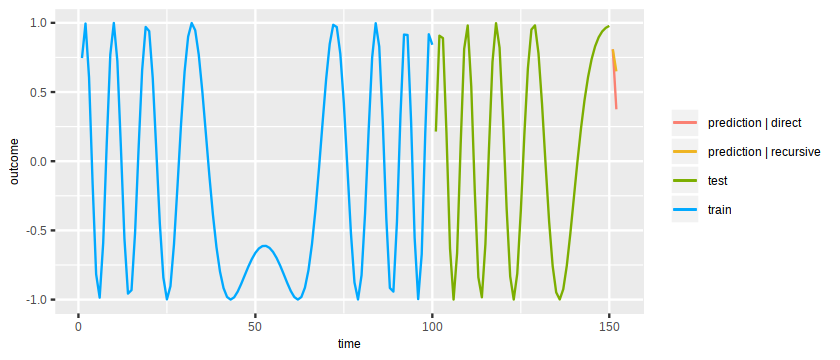

In [116]:
ggplot() +
geom_line(aes(x=time, y=outcome, color="train"), data=data.train) +
geom_line(aes(x=time, y=outcome, color="test"), data=data.test) +
geom_line(aes(x=time, y=outcome.predicted, color="prediction | direct"), data=direct.predicted) + 
geom_line(aes(x=time, y=outcome.predicted, color="prediction | recursive"), data=recursive.predicted) + 
scale_color_manual(values=PALETTE[c(7,5,3,1)])

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised June 23, 2020
</span>
</p>
</font>